## Project Definition - Project Overview

This project is meant to provide product recommendations to users that would be deemed useful and also more efficient than seeking out the products manually.  We will look at the users similarity to other users along with the types of products that those similar users have added to their carts in the algorithm

## Project Definition - Problem Statement

Users can spend a fair amount of time on a website before finding a product that they might be interested in trying or buying.  Much of this time is spent using filters or navigating based on a website's setup.  This can often take more time than a user has or is interested in spending.  Instead we can supplement the user's journey and surface recommended items to consider based on their shopping behavior.  

## Project Definition - Metrics

We will look at the accuracy of our model to determine if it is working as intended.  Accuracy is useful as it is a simple metric which is best used in a balanced data set. We would then extend our metrics to look at add to product rate (based on visitation of the user) once our recommendation algorithm is implemented.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from collections import Counter
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, precision_recall_fscore_support

from sklearn.model_selection import train_test_split

# display plots inline
%matplotlib inline

In [2]:
# review dataset
directory = '/workspace/home/data/'
filename = 'event_data.csv'
events_df = pd.read_csv(directory+filename)
events_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a
1,2020-01-01 00:00:09 UTC,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a
2,2020-01-01 00:00:19 UTC,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3,2020-01-01 00:00:24 UTC,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
4,2020-01-01 00:00:25 UTC,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb
5,2020-01-01 00:00:30 UTC,view,5837111,1783999068867920626,NaN,staleks,6.35,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
6,2020-01-01 00:00:37 UTC,cart,5850281,1487580006300255120,NaN,marathon,137.78,593016733,848f607c-1d14-474a-8869-c40e60783c9d
7,2020-01-01 00:00:46 UTC,view,5802440,2151191070908613477,NaN,NaN,2.16,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77
8,2020-01-01 00:00:57 UTC,view,5726464,1487580005268456287,NaN,NaN,5.56,420652863,546f6af3-a517-4752-a98b-80c4c5860711
9,2020-01-01 00:01:02 UTC,remove_from_cart,5850281,1487580006300255120,NaN,marathon,137.78,593016733,848f607c-1d14-474a-8869-c40e60783c9d


## Analysis - Data Exploration and Data Visualization

**events_df -**
csv contains a log of user events related to different products.  Products - product detail includes the category, brand and price.  Interactions - event types include view, cart, remove_from_cart, and purchase.

In [3]:
# popular products
events_df.product_id.value_counts().sort_values(ascending=False).head()
#TODO chart of product viewership by count binned

5809910    883
5917178    338
5809912    325
5700037    316
5802432    282
Name: product_id, dtype: int64

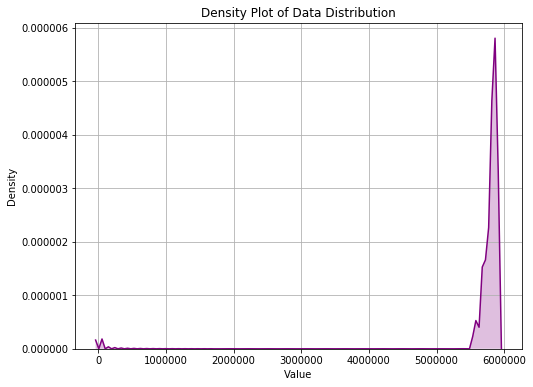

"\nplt.figure(figsize=(8, 6))\nsns.violinplot(data=product_ids, inner='quartile', color='lightgreen')\nplt.title('Violin Plot of Data Distribution')\nplt.xlabel('Value')\nplt.grid(True)\nplt.show()\n"

In [4]:
product_ids = np.unique(np.array(events_df.product_id))
#print(sorted(product_ids, reverse=True))

'''
plt.figure(figsize=(8, 6))
plt.hist(product_ids, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(product_ids, vert=False)
plt.title('Box Plot of Data Distribution')
plt.xlabel('Value')
plt.grid(True)
plt.show()
'''

plt.figure(figsize=(8, 6))
sns.kdeplot(product_ids, shade=True, color='purple')
plt.title('Density Plot of Data Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

'''
plt.figure(figsize=(8, 6))
sns.violinplot(data=product_ids, inner='quartile', color='lightgreen')
plt.title('Violin Plot of Data Distribution')
plt.xlabel('Value')
plt.grid(True)
plt.show()
'''

**product_id -** Product ids tend to contain seven digits though there are some with four digits.  Potentially relevant if considered legacy ids


In [5]:
# engaged users
user_event_counts = events_df.user_id.value_counts().sort_values(ascending=False).head()
unique_users = events_df.user_id.nunique()
#TODO chart of users engagment by count binned
print('unique users -', unique_users)
print('user_event_counts - ', user_event_counts)

unique users - 14812
user_event_counts -  595424692    480
591039167    438
539473388    433
580962415    359
386491215    335
Name: user_id, dtype: int64


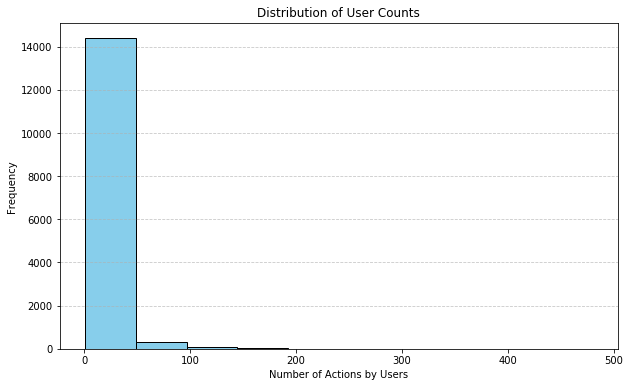

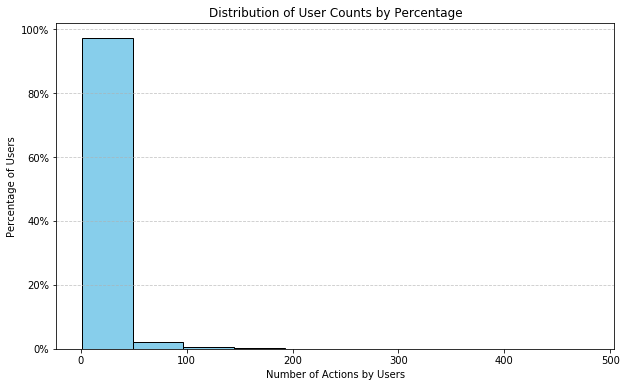

In [6]:
# Users
user_events = np.array(events_df.user_id.value_counts())

plt.figure(figsize=(10, 6))
plt.hist(user_events, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of User Counts')
plt.xlabel('Number of Actions by Users')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

total_users = len(user_events)

# Create a histogram with percentages
plt.figure(figsize=(10, 6))
plt.hist(user_events, bins=10, color='skyblue', edgecolor='black', weights=np.ones(total_users) / total_users)

# Format y-axis to show percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.title('Distribution of User Counts by Percentage')
plt.xlabel('Number of Actions by Users')
plt.ylabel('Percentage of Users')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
print(events_df.user_id.value_counts().describe())

count    14812.000000
mean         6.751215
std         18.843298
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        480.000000
Name: user_id, dtype: float64


**users -** ~90% of users logged have around 0-50 events.  Mean of 6.75 events with a standard deviation of 18.84.  Top user has 480 events.  

In [8]:
# categories
category_event_counts = events_df.category_id.value_counts().sort_values(ascending=False).head()
unique_categories = events_df.category_id.nunique()
print('unique_categories - ', unique_categories)
print('category_event_counts - ', category_event_counts) 
print(events_df.category_id.value_counts().describe())
print(events_df.category_id.head())
null_count = events_df['category_id'].isna().sum()
print('null count', null_count)


unique_categories -  392
category_event_counts -  1487580005595612013    7665
1487580005092295511    3685
1487580007675986893    3442
1602943681873052386    3221
1487580006317032337    2876
Name: category_id, dtype: int64
count     392.000000
mean      255.099490
std       602.625176
min         1.000000
25%        21.000000
50%        80.500000
75%       239.250000
max      7665.000000
Name: category_id, dtype: float64
0    1602943681873052386
1    1487580012121948301
2    1783999068867920626
3    1487580005754995573
4    2115334439910245200
Name: category_id, dtype: int64
null count 0


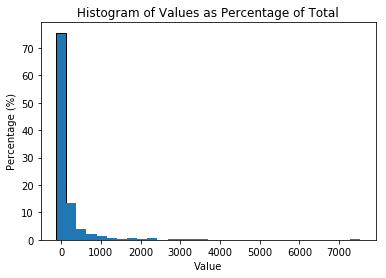

In [9]:
# Users
category_events = events_df.category_id.value_counts()

category_counts = Counter(category_events)
#print(category_counts)
# Separate keys and values for plotting
categories = list(category_counts.keys())
counts = list(category_counts.values())
count_total = len(category_events)

count_percent = {key: value / count_total for key, value in category_counts.items()}.values()
#print(count_percent)



data_clean = category_events.dropna()

# Calculate histogram
counts, bins = np.histogram(data_clean, bins=30)

# Convert counts to percentages
percentages = (counts / counts.sum()) * 100

# Plot the histogram as percentages
plt.bar(bins[:-1], percentages, width=np.diff(bins), edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Percentage (%)')
plt.title('Histogram of Values as Percentage of Total')
plt.show()




**category id** most category codes are null so likely not a userful field ot use for analysis purposes.  Category_id is a useful field which ~80% of categories have between 0-1000 events (mean of 255).

unique_brands -  215
brand_event_counts -  runail     7295
grattol    4209
irisk      4003
masura     2912
kapous     2049
Name: brand, dtype: int64
brand_median_price -  brand
airnails       1.43
almea         31.59
andrea         5.54
ardell         6.37
art-visage     2.70
Name: price, dtype: float64


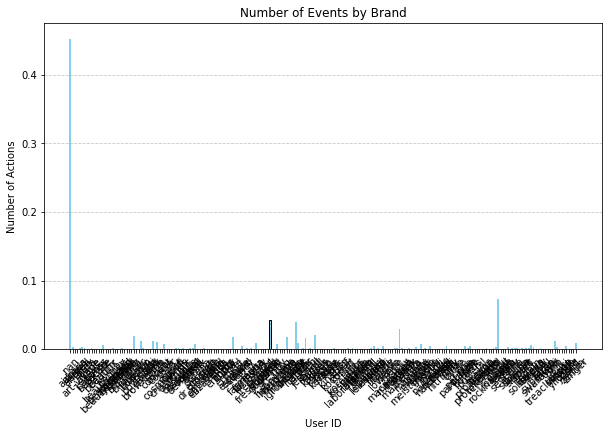

In [10]:
# brands
brand_event_counts = events_df.brand.value_counts().sort_values(ascending=False).head()
unique_brands = events_df.brand.nunique()
brand_median_price = events_df.groupby('brand')['price'].median()
print('unique_brands - ', unique_brands)
print('brand_event_counts - ', brand_event_counts) 
print('brand_median_price - ', brand_median_price.head())
# TODO chart of brand median price

# Separate keys and values for plotting
brand_events = np.array(events_df.brand)
brand_counts = Counter(brand_events)
categories = list(brand_counts.keys())
count_total = len(brand_events)

counts = list(brand_counts.values())

count_percent = {key: value / count_total for key, value in brand_counts.items()}.values()


# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, count_percent, color='skyblue', edgecolor='black')

plt.title('Number of Events by Brand')
plt.xlabel('User ID')
plt.ylabel('Number of Actions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long
plt.show()


**brand -** almost half of brands are null, we may try to sample the data set just based on brand tbd

In [11]:
# event types
event_type_counts = events_df.event_type.value_counts().sort_values(ascending=False).head()
unique_event_types = events_df.event_type.nunique()
print('unique_event_types - ', unique_event_types)
print('event_type_counts -', event_type_counts ) 


unique_event_types -  4
event_type_counts - view                48412
cart                27023
remove_from_cart    20339
purchase             4225
Name: event_type, dtype: int64


**event types -** As expected with event type metrics, view --> cart --> remove_from_cart --> purchase creates a funnel type conversion funnel.  We will use event types to surface recommendations based on similar users.  one idea would be to focus just on cart products where a user would be recommended products to add to their cart.

## Methodology - Data Preprocessing

In [3]:
# Check for duplicates
dupes = events_df.duplicated()
print(events_df.shape)
print(dupes.value_counts())
# Drop duplicate rows
events_df_cleaned = events_df.drop_duplicates()
print(events_df_cleaned.shape)

(99999, 9)
False    93911
True      6088
dtype: int64
(93911, 9)


In [4]:
# Take subset of columns that are needed
events_df_cleaned.columns
events_df_selected = events_df_cleaned[['event_time', 'event_type', \
                                        'product_id', 'price', 'user_id', 'user_session']]
print(events_df_selected.shape)

(93911, 6)


In [5]:
# Check for nulls
missing_values = events_df_selected.isnull().sum()
print(missing_values)
# Remove rows where user session is null
events_df_selected = events_df_selected.dropna()
print(events_df_selected.shape)

event_time      0
event_type      0
product_id      0
price           0
user_id         0
user_session    9
dtype: int64
(93902, 6)


In [6]:
# filter for just cart events and then purchase events
carts_df = events_df_selected[events_df_selected['event_type']=='cart']
print(carts_df.shape)
print(carts_df.head())
purchase_df = events_df_selected[events_df_selected['event_type']=='purchase']
print(purchase_df.shape)
print(purchase_df.head())

(26538, 6)
                 event_time event_type  product_id   price    user_id  \
6   2020-01-01 00:00:37 UTC       cart     5850281  137.78  593016733   
12  2020-01-01 00:01:13 UTC       cart     5802440    2.16  595411904   
23  2020-01-01 00:01:51 UTC       cart     5810716    1.27  595414814   
30  2020-01-01 00:02:45 UTC       cart     5809803    1.27  595414814   
35  2020-01-01 00:03:13 UTC       cart     5591314    4.29  588166646   

                            user_session  
6   848f607c-1d14-474a-8869-c40e60783c9d  
12  74ca1cd5-5381-4ffe-b00b-a258b390db77  
23  dc2fb978-1008-4097-b598-440974faa7c3  
30  dc2fb978-1008-4097-b598-440974faa7c3  
35  e099adca-fec5-4aef-820f-6116836e322a  
(4223, 6)
                  event_time event_type  product_id  price    user_id  \
60   2020-01-01 00:06:07 UTC   purchase     5802440   2.16  595411904   
61   2020-01-01 00:06:07 UTC   purchase     5825203   7.92  595411904   
590  2020-01-01 00:51:38 UTC   purchase     5842655  14.51  595

In [9]:
# Create user cart product matrix
def create_user_product_matrix(df):
    '''
    INPUT:
    df - dataframe that contains user_id and product_id for each cart event
    
    OUTPUT:
    user_product - user product matrix
    
    Description - Returns a matrix of user ids as rows adn product ids as columns with 1 values
    denoting when a user added a specific product to a cart
    
    '''
    # Create counter item for each row
    df['count'] = 1
    user_product = df.groupby(['user_id', 'product_id'])["count"].max().unstack().fillna(0)
    return user_product

In [10]:
cart_product = create_user_product_matrix(carts_df)
purchase_product = create_user_product_matrix(purchase_df)
print(purchase_product)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


product_id  3762     3928     3978     4006     4185     4497     4542     \
user_id                                                                     
76025480        0.0      0.0      0.0      0.0      0.0      0.0      0.0   
234035928       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
243876205       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
245202883       1.0      0.0      0.0      0.0      1.0      0.0      0.0   
246787411       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
249689089       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
276508395       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
278899539       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
281856857       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
285045122       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
287758725       0.0      0.0      0.0      0.0      1.0      0.0      0.0   

In [11]:
# Tests
print(carts_df['product_id'].count())
products = carts_df.product_id.nunique()
users = carts_df.user_id.nunique()
print(users)
print(carts_df.groupby('user_id')['product_id'].nunique().head())

# Test columns/rows to match number of product ids and users
assert cart_product.shape[1] == products
assert cart_product.shape[0] == users
assert cart_product.sum(axis=1)[72931003] == 38
print("You have passed our quick tests!  Please proceed!")


26538
3209
user_id
43695999    15
56612519     8
70197834     4
72931003    38
76025480    10
Name: product_id, dtype: int64
You have passed our quick tests!  Please proceed!


## Methodology - Implementation

In [12]:
# function to find users similar to each other

def find_similar_users(user_id, user_product=cart_product):
    '''
    INPUT:
    user_id - (int) a user_id
    user_product - (pandas dataframe) matrix of users by products they added to cart: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    user_sim = user_product.dot(user_product.loc[user_id])

    # sort by similarity
    user_sim = user_sim.sort_values(ascending=False)

    # create list of just the ids
    most_similar_users = list(user_sim.index)
   
    # remove the own user's id
    most_similar_users.remove(user_id)
       
    return most_similar_users # return a list of the users in order from most to least similar

In [20]:
find_similar_users(595713521)[:10]

[562893893,
 584466703,
 567409758,
 568633294,
 572676469,
 595616314,
 595630360,
 505577477,
 595349995,
 595676160]

In [21]:
# Function that grabs list of products a user has added to their cart
def get_product_ids(user_id, user_product=cart_product):
    '''
    INPUT:
    user_id - (int) a user id
    user_product - (pandas dataframe) matrix of users by product ids added to cart: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    product_ids - (list) a list of the product ids added to carts by the user
    
    
    Description:
    Provides a list of the product ids a user has added to a cart
    '''
    user_items_all = user_product.loc[user_id]
    # Find only products added to a cart (denoted as 1)
    product_ids = list(map(str,user_items_all[user_items_all == 1].index))
    return product_ids # return product ids

In [22]:
# Function that looks at similar users and returns the top products based on purchase
def user_recs(user_id, m=2):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of product id recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds products the user has not added to a cart provides them as recs
    Does this until m recommendations are found
    
    Notes:
    product ids are ranked based on whether a user purchased or not
    
    '''
    # Your code here
    similar_users = find_similar_users(user_id)
    # grab list of products target user has added to their carts
    user_cart_product_list = get_product_ids(user_id, cart_product)
    print('user_cart_product_list', user_cart_product_list)
    recs = []
    # Loop through users
    for user in similar_users:
        print('user', user)
        if len(recs) >= m:
            break
        # get purchased products from similar user
        cart_product_list = get_product_ids(user, cart_product)
        purchased_product_list = get_product_ids(user, purchase_product)
        print('cart_prouduct_list', cart_product_list)
        print('purchased_prouduct_list', purchased_product_list)
        # compare to ids user has purchased and remove intersection from target user has added to cart
        noncart_products = list(set(purchased_product_list) - set(user_cart_product_list))
        for id in noncart_products:
            # Does this until m recommendations are found
            if len(recs) >= m:
                break
                recs.append(id)
            else:
                recs.append(id)
    
    return recs # return your recommendations for this user_id    

In [23]:
user_id = 556831666
user_recs(user_id)

user_cart_product_list ['5658571', '5740017', '5789670', '5794073', '5817685', '5835915', '5837649', '5839048', '5839049']
user 440799617
cart_prouduct_list ['5646938', '5648572', '5649238', '5668431', '5714897', '5714918', '5714921', '5726464', '5783342', '5783345', '5783347', '5783352', '5783547', '5783548', '5783566', '5783570', '5783571', '5783942', '5783970', '5784571', '5784580', '5784584', '5784614', '5785445', '5785447', '5785449', '5785475', '5785484', '5786487', '5786490', '5786492', '5786494', '5786495', '5786496', '5786499', '5786518', '5786923', '5786939', '5786945', '5786946', '5786955', '5786957', '5787167', '5787169', '5787191', '5787196', '5787535', '5787552', '5787559', '5787889', '5787904', '5787914', '5787928', '5787929', '5788712', '5788721', '5794054', '5794070', '5794073', '5799745', '5799751', '5799752', '5799753', '5799757', '5799763', '5799914', '5799916', '5799925', '5834926', '5834927', '5837648', '5837649', '5837650', '5837651', '5838935', '5839048', '58390

['5839054', '5842949']

In [24]:
cart_product.shape

(3209, 10012)

In [20]:
# Perform svd on user cart product matrix
u, s, vt = np.linalg.svd(cart_product) # use the built in to get the three matrices

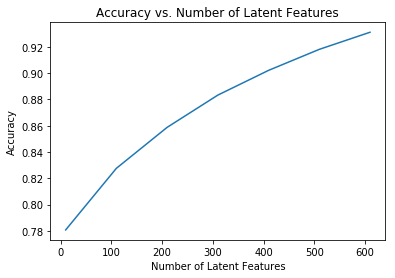

In [26]:
num_latent_feats = np.arange(10,700+10,100)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    cart_product_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(cart_product, cart_product_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/events_df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');


In [27]:
print(carts_df.shape)

(26538, 7)


## Methodology - Refinement

We will split the carts dataframe into training and test sets to understand accuracy across each.  As part of this process we will need to ensure that users we measure in the test set exist in the training set.

In [28]:
df_train = carts_df.head(20000)
df_test = carts_df.tail(5000)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    # Your code here
    user_item_train = create_user_product_matrix(df_train)
    user_item_test = create_user_product_matrix(df_test)
    
    test_idx = user_item_test.index
    test_arts = user_item_test.columns
    
    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [29]:
# Get indices of users and items in both matrices
train_users = set(user_item_train.index)  # Users in train matrix
train_items = set(user_item_train.columns)  # Items in train matrix

test_users = set(user_item_test.index)  # Users in test matrix
test_items = set(user_item_test.columns)  # Items in test matrix

# Find common users and items
common_users = train_users.intersection(test_users)
common_items = train_items.intersection(test_items)

In [30]:
print('train_users', len(train_users))
print('train_items', len(train_items))
print('test_users', len(test_users))
print('test_items', len(test_items))
print('common_users', len(common_users))
print('common_items', len(common_items))

train_users 2495
train_items 8447
test_users 688
test_items 3282
common_users 112
common_items 2036


In [31]:
row_idx = user_item_train.index.isin(common_users)
col_idx = user_item_train.columns.isin(common_items)

In [32]:
u_train, s_train, vt_train = np.linalg.svd(user_item_train)

In [33]:
u_test = u_train[row_idx, :]
vt_test = vt_train[:, col_idx]

In [34]:
num_latent_feats = np.arange(10,700+10,100)
sum_train = []
sum_tests = []

In [35]:
user_item_test.shape

(688, 3282)

In [36]:
# Filter test set to only include users across both training and testing
user_item_compare = user_item_test.loc[common_users, common_items]

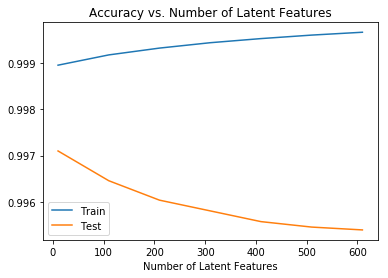

In [37]:
for k in num_latent_feats:
    # Train: restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]

    # Test: restructure with k latent features
    s_train_lat = np.diag(s_train[:k])
    u_test_lat, vt_test_lat = u_test[:, :k], vt_test[:k, :]

    # Train and Test: take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    test_pred = np.around(np.dot(np.dot(u_test_lat, s_train_lat), vt_test_lat))
    
    # Train and Test: compute error for each prediction to actual value
    diffs_train = np.subtract(cart_product, user_item_est)
    diffs_test = np.subtract(user_item_compare, test_pred)
    
    # Train and Test: total errors and keep track of them
    err_train = np.sum(np.sum(np.abs(diffs_train)))
    sum_train.append(err_train)
    err_test = np.sum(np.sum(np.abs(diffs_test)))
    sum_tests.append(err_test)

plt.plot(num_latent_feats, 1 - np.array(sum_train)/(user_item_train.shape[0]*user_item_train.shape[1]), label = "Train");
plt.plot(num_latent_feats, 1 - np.array(sum_tests)/(user_item_compare.shape[0]*user_item_compare.shape[1]), label = "Test")
plt.xlabel('Number of Latent Features');
plt.legend()
plt.title('Accuracy vs. Number of Latent Features');

## Results - Model Evaluation and Validation

We used an SVD model to provide product cart recommendations for our users.  The model looks at similar users and then provides a list of recommended products based on cart popularity.  Our SVD model was very accurate it determining which cart items to recommend to users in the training and test set.  The accuracy improved slightly on the training set as we added latent features, but declined on the test set.  This could be due to overfitting as there was significantly more data in the training set.  We can try to increase the size of the test set and see if this changes the result.

We would ultimately want to run an A/B test on our recommendations to ensure that those customers are adding products to cart at the same or higher rate (based on visit) as before.  Our add to cart rate would be the primary metric we would use to measure effectiveness. 

In [13]:
df_train = carts_df.head(16538)
df_test = carts_df.tail(10000)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    # Your code here
    user_item_train = create_user_product_matrix(df_train)
    user_item_test = create_user_product_matrix(df_test)
    
    test_idx = user_item_test.index
    test_arts = user_item_test.columns
    
    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [14]:
# Get indices of users and items in both matrices
train_users = set(user_item_train.index)  # Users in train matrix
train_items = set(user_item_train.columns)  # Items in train matrix

test_users = set(user_item_test.index)  # Users in test matrix
test_items = set(user_item_test.columns)  # Items in test matrix

# Find common users and items
common_users = train_users.intersection(test_users)
common_items = train_items.intersection(test_items)

In [15]:
print('train_users', len(train_users))
print('train_items', len(train_items))
print('test_users', len(test_users))
print('test_items', len(test_items))
print('common_users', len(common_users))
print('common_items', len(common_items))

train_users 2098
train_items 7512
test_users 1330
test_items 5430
common_users 219
common_items 2930


In [16]:
row_idx = user_item_train.index.isin(common_users)
col_idx = user_item_train.columns.isin(common_items)

In [17]:
u_train, s_train, vt_train = np.linalg.svd(user_item_train)

In [18]:
u_test = u_train[row_idx, :]
vt_test = vt_train[:, col_idx]
num_latent_feats = np.arange(10,700+10,100)
sum_train = []
sum_tests = []
user_item_test.shape
# Filter test set to only include users across both training and testing
user_item_compare = user_item_test.loc[common_users, common_items]

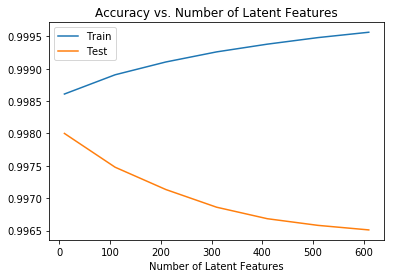

In [21]:
for k in num_latent_feats:
    # Train: restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]

    # Test: restructure with k latent features
    s_train_lat = np.diag(s_train[:k])
    u_test_lat, vt_test_lat = u_test[:, :k], vt_test[:k, :]

    # Train and Test: take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    test_pred = np.around(np.dot(np.dot(u_test_lat, s_train_lat), vt_test_lat))
    
    # Train and Test: compute error for each prediction to actual value
    diffs_train = np.subtract(cart_product, user_item_est)
    diffs_test = np.subtract(user_item_compare, test_pred)
    
    # Train and Test: total errors and keep track of them
    err_train = np.sum(np.sum(np.abs(diffs_train)))
    sum_train.append(err_train)
    err_test = np.sum(np.sum(np.abs(diffs_test)))
    sum_tests.append(err_test)

plt.plot(num_latent_feats, 1 - np.array(sum_train)/(user_item_train.shape[0]*user_item_train.shape[1]), label = "Train");
plt.plot(num_latent_feats, 1 - np.array(sum_tests)/(user_item_compare.shape[0]*user_item_compare.shape[1]), label = "Test")
plt.xlabel('Number of Latent Features');
plt.legend()
plt.title('Accuracy vs. Number of Latent Features');

## Results - Justification

The model looks to perform quite well as similar users do tend to add the same things to their carts. The one consideration we may want to change in the future is the addition of a cart recommendation before a customer ever adds anything.  We could do this based on view behavior.  

## Conclusion - Reflection

We were able to take a fairly modular idea of providing recommendations to users based on their habits and similarity to other users.  This module can be used beyond just product recommendations which makes it quite appealing, providing the ability to leverage for lots of scenarios.  The one aspect I found most tricky was making sure the test and training sets contained the same users AND products such that we were able to test the accuracy in a uniform way.  Initial version had mismatched matrices which didn't allow us to properly calculate accuracy.

## Conclusion - Improvement

Once we implement the algorithm and get a better understanding of how the add to cart rate improves (the expectation) we could then extend the model farther up the purchase funnel and apply it just to viewing behavior allowing us to provide recommendations even if a customer has never added anything to their cart.  We could then go even farther up the funnel and look at the registration or onboarding flow and prompt the user to answer a series of questions to better understand their interests and then provide recommendations almost immediately.  